In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict, Counter
from pathlib import Path
import joblib
import sys
from types import ModuleType, FunctionType
from gc import get_referents
%matplotlib inline

In [5]:
main_dir = "/project/InternalMedicine/Basit_lab/s223850/ED-StaticDynamic/ml_results_240324/tr_8_te_4/run_1/"

In [6]:
static_dir = os.path.join(main_dir, 'static')
dynamic_dir = os.path.join(main_dir, 'dynamic')
comb_dir = os.path.join(main_dir, 'comb')
all_dir = os.path.join(main_dir, 'all')


In [8]:
with open(os.path.join(static_dir, 'static_results_62_0.joblib'), 'rb') as f:
    d = joblib.load(f)

In [9]:
df = pd.DataFrame(d['cat']['model'].feature_importances_, columns=['imp'])

In [10]:
df['names'] = d['cat']['model'].feature_names_

In [11]:
df.sort_values(by='imp', ascending=False).iloc[:10]['names'].tolist()

['Acuity_Level',
 'Number of past appointments in last 60 days',
 'Means_Of_Arrival_Ambulance',
 'Number of past inpatient admissions over ED visits in last three years',
 'MOTORVEHICLECRASH',
 'FirstRace_Black or African American',
 'FirstRace_White',
 'Unknown',
 'BREATHINGPROBLEM',
 'Means_Of_Arrival_Car']

In [31]:
BLACKLIST = type, ModuleType, FunctionType

def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

In [25]:
getsize(d['cat']['model'])/(1024*1024)

4.395211219787598

In [26]:
with open('./sample_cat_model.joblib', 'wb') as f:
    joblib.dump(d['cat']['model'], f)

In [4]:
os.listdir(c_dir)

NameError: name 'c_dir' is not defined

In [12]:
sorted(os.listdir(all_dir), key=lambda x: int(x.split('_')[2]), reverse=True)

['all_results_250_8.joblib',
 'all_results_250_10.joblib',
 'all_results_250_0.joblib',
 'all_results_250_14.joblib',
 'all_results_250_4.joblib',
 'all_results_250_12.joblib',
 'all_results_250_2.joblib',
 'all_results_250_6.joblib',
 'all_results_250_16.joblib',
 'all_results_249_2.joblib',
 'all_results_249_18.joblib',
 'all_results_249_12.joblib',
 'all_results_249_6.joblib',
 'all_results_249_16.joblib',
 'all_results_249_0.joblib',
 'all_results_249_4.joblib',
 'all_results_249_8.joblib',
 'all_results_249_10.joblib',
 'all_results_249_14.joblib',
 'all_results_249_20.joblib',
 'all_results_248_22.joblib',
 'all_results_248_2.joblib',
 'all_results_248_28.joblib',
 'all_results_248_18.joblib',
 'all_results_248_4.joblib',
 'all_results_248_24.joblib',
 'all_results_248_20.joblib',
 'all_results_248_0.joblib',
 'all_results_248_10.joblib',
 'all_results_248_26.joblib',
 'all_results_248_6.joblib',
 'all_results_248_16.joblib',
 'all_results_248_8.joblib',
 'all_results_248_14.jobl

In [12]:
def agg_eidx_dict(files_list):
    dd = defaultdict(list)
    for file in files_list:
        dd[int(file.split('_')[2])].append(file)
    return dd

In [13]:
# Analyze ALL model
all_files = [file for file in os.listdir(all_dir) if file.startswith('all') and file.endswith('.joblib')] 
all_files = sorted(all_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
all_dict = agg_eidx_dict(all_files)

all_index = []
all_train_bacc = []
all_train_ppv = []
all_train_roc = []

all_val_bacc = []
all_val_ppv = []
all_val_roc = []

all_test_bacc = []
all_test_ppv = []
all_test_roc = []

for key in all_dict:
    all_files_in_order = sorted(all_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    all_index.append(key)
    train_bacc = []
    train_ppv = []
    train_roc = []
    
    val_bacc = []
    val_ppv = []
    val_roc = []
    
    test_bacc = []
    test_ppv = []
    test_roc = []
    for file in all_files_in_order:
        with open(os.path.join(all_dir, file), 'rb') as f:
            all_result_data = joblib.load(f)
        clc = 'cat'
        train_bacc.append(all_result_data[clc]['train_score_avg']['bacc'])
        train_ppv.append(all_result_data[clc]['train_score_avg']['ppv'])
        train_roc.append(all_result_data[clc]['train_score_avg']['roc'])
        
        val_bacc.append(all_result_data[clc]['val_score_avg']['bacc'])
        val_ppv.append(all_result_data[clc]['val_score_avg']['ppv'])
        val_roc.append(all_result_data[clc]['val_score_avg']['roc'])
        
        test_bacc.append(all_result_data[clc]['test_results']['bacc'])
        test_ppv.append(all_result_data[clc]['test_results']['ppv'])
        test_roc.append(all_result_data[clc]['test_results']['roc'])
    
            
    # all_train_bacc.append(train_bacc)
    # all_train_ppv.append(train_ppv)
    # all_train_roc.append(train_roc)
    
    
    # all_val_bacc.append(val_bacc)
    # all_val_ppv.append(val_ppv)
    # all_val_roc.append(val_roc)

    # all_test_bacc.append(test_bacc)
    # all_test_ppv.append(test_ppv)
    # all_test_roc.append(test_roc)
    all_train_bacc.append((np.mean(train_bacc), np.std(train_bacc, ddof=1)))
    all_train_ppv.append((np.mean(train_ppv), np.std(train_ppv, ddof=1)))
    all_train_roc.append((np.mean(train_roc), np.std(train_roc, ddof=1)))
    
    
    all_val_bacc.append((np.mean(val_bacc), np.std(val_bacc, ddof=1)))
    all_val_ppv.append((np.mean(val_ppv), np.std(val_ppv, ddof=1)))
    all_val_roc.append((np.mean(val_roc), np.std(val_roc, ddof=1)))

    all_test_bacc.append((np.mean(test_bacc), np.std(test_bacc, ddof=1)))
    all_test_ppv.append((np.mean(test_ppv), np.std(test_ppv, ddof=1)))
    all_test_roc.append((np.mean(test_roc), np.std(test_roc, ddof=1)))
        



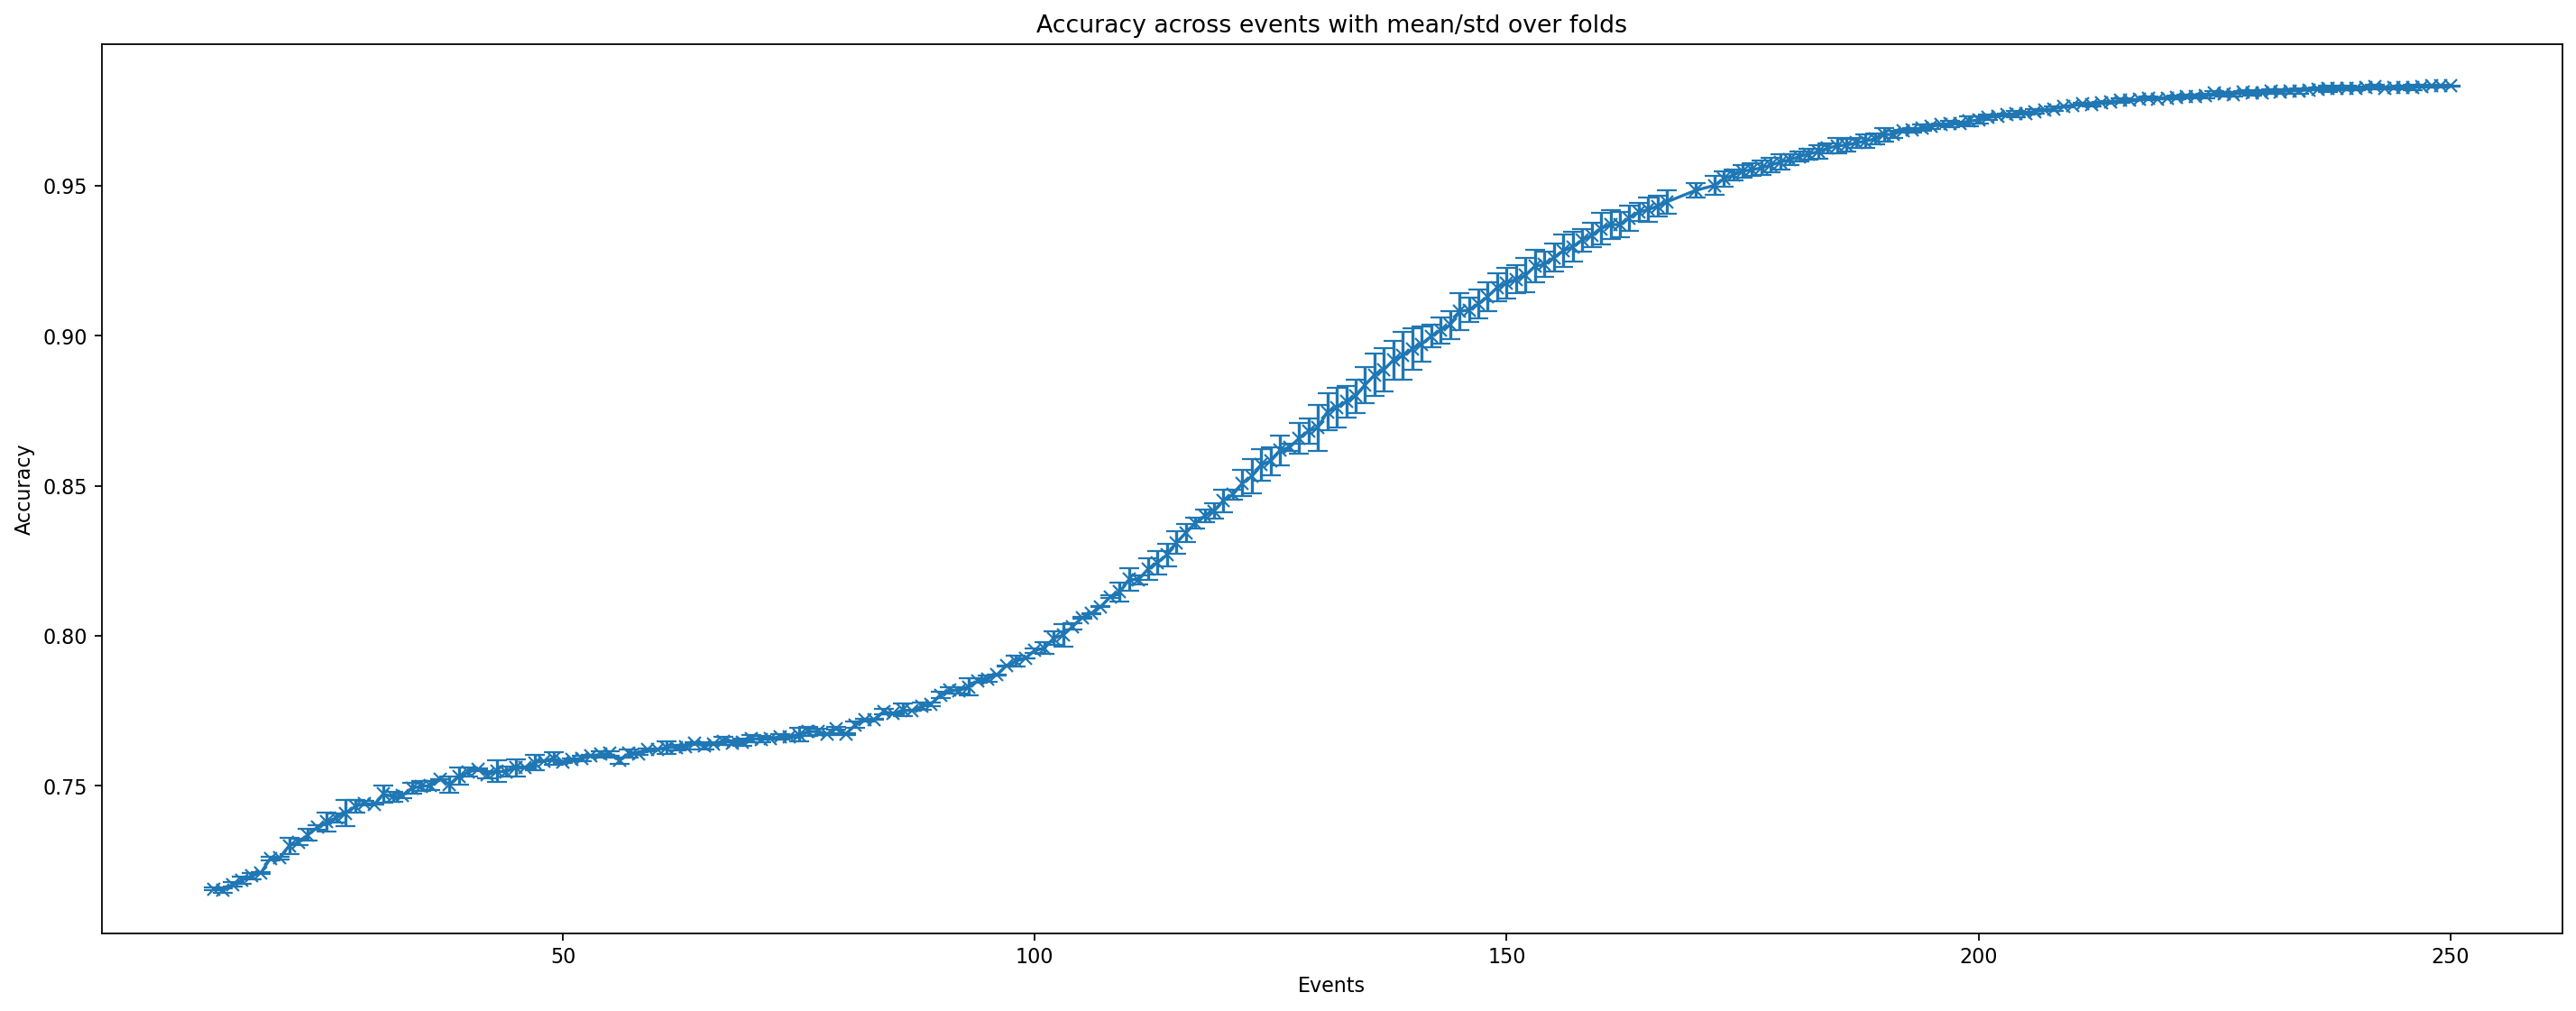

In [14]:
fig, ax = plt.subplots(figsize=(22,8), dpi=160)
plt.errorbar(all_index, list(map(lambda x:x[0], all_test_bacc)), yerr=list(map(lambda x:x[1], all_test_bacc)), fmt='-x', capsize=5)
plt.ylabel('Accuracy')
plt.xlabel('Events')
plt.title("Accuracy across events with mean/std over folds")

fig.savefig("error.png")
plt.show()


In [67]:
# Analyze Comb model
comb_files = [file for file in os.listdir(comb_dir) if file.startswith('comb') and file.endswith('.joblib')] 
comb_files = sorted(comb_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
comb_dict = agg_eidx_dict(comb_files)

comb_index = []
comb_train_bacc = []
comb_train_ppv = []
comb_train_roc = []

comb_val_bacc = []
comb_val_ppv = []
comb_val_roc = []

comb_test_bacc = []
comb_test_ppv = []
comb_test_roc = []

for key in comb_dict:
    comb_files_in_order = sorted(comb_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    comb_index.append(key)
    train_bacc = []
    train_ppv = []
    train_roc = []
    
    val_bacc = []
    val_ppv = []
    val_roc = []
    
    test_bacc = []
    test_ppv = []
    test_roc = []
    for file in comb_files_in_order:
        with open(os.path.join(comb_dir, file), 'rb') as f:
            comb_result_data = joblib.load(f)
        clc = 'cat'
        train_bacc.append(comb_result_data[clc]['train_score_avg']['bacc'])
        train_ppv.append(comb_result_data[clc]['train_score_avg']['ppv'])
        train_roc.append(comb_result_data[clc]['train_score_avg']['roc'])
        
        val_bacc.append(comb_result_data[clc]['val_score_avg']['bacc'])
        val_ppv.append(comb_result_data[clc]['val_score_avg']['ppv'])
        val_roc.append(comb_result_data[clc]['val_score_avg']['roc'])
        
        test_bacc.append(comb_result_data[clc]['test_results']['bacc'])
        test_ppv.append(comb_result_data[clc]['test_results']['ppv'])
        test_roc.append(comb_result_data[clc]['test_results']['roc'])
    
            
    # all_train_bacc.append(train_bacc)
    # all_train_ppv.append(train_ppv)
    # all_train_roc.append(train_roc)
    
    
    # all_val_bacc.append(val_bacc)
    # all_val_ppv.append(val_ppv)
    # all_val_roc.append(val_roc)

    # all_test_bacc.append(test_bacc)
    # all_test_ppv.append(test_ppv)
    # all_test_roc.append(test_roc)
    comb_train_bacc.append((np.mean(train_bacc), np.std(train_bacc, ddof=1)))
    comb_train_ppv.append((np.mean(train_ppv), np.std(train_ppv, ddof=1)))
    comb_train_roc.append((np.mean(train_roc), np.std(train_roc, ddof=1)))
    
    
    comb_val_bacc.append((np.mean(val_bacc), np.std(val_bacc, ddof=1)))
    comb_val_ppv.append((np.mean(val_ppv), np.std(val_ppv, ddof=1)))
    comb_val_roc.append((np.mean(val_roc), np.std(val_roc, ddof=1)))

    comb_test_bacc.append((np.mean(test_bacc), np.std(test_bacc, ddof=1)))
    comb_test_ppv.append((np.mean(test_ppv), np.std(test_ppv, ddof=1)))
    comb_test_roc.append((np.mean(test_roc), np.std(test_roc, ddof=1)))
        



In [17]:
# Analyze static model
s_files = [file for file in os.listdir(static_dir) if file.startswith('static') and file.endswith('.joblib')] 
s_files = sorted(s_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
s_dict = agg_eidx_dict(s_files)

s_index = []
s_train_bacc = []
s_train_ppv = []
s_train_roc = []

s_val_bacc = []
s_val_ppv = []
s_val_roc = []

s_test_bacc = []
s_test_ppv = []
s_test_roc = []

for key in s_dict:
    s_files_in_order = sorted(s_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    s_index.append(key)
    train_bacc = []
    train_ppv = []
    train_roc = []
    
    val_bacc = []
    val_ppv = []
    val_roc = []
    
    test_bacc = []
    test_ppv = []
    test_roc = []
    for file in s_files_in_order:
        with open(os.path.join(static_dir, file), 'rb') as f:
            s_result_data = joblib.load(f)
        clc = 'cat'
        train_bacc.append(s_result_data[clc]['train_score_avg']['bacc'])
        train_ppv.append(s_result_data[clc]['train_score_avg']['ppv'])
        train_roc.append(s_result_data[clc]['train_score_avg']['roc'])
        
        val_bacc.append(s_result_data[clc]['val_score_avg']['bacc'])
        val_ppv.append(s_result_data[clc]['val_score_avg']['ppv'])
        val_roc.append(s_result_data[clc]['val_score_avg']['roc'])
        
        test_bacc.append(s_result_data[clc]['test_results']['bacc'])
        test_ppv.append(s_result_data[clc]['test_results']['ppv'])
        test_roc.append(s_result_data[clc]['test_results']['roc'])
    
            
    # all_train_bacc.append(train_bacc)
    # all_train_ppv.append(train_ppv)
    # all_train_roc.append(train_roc)
    
    
    # all_val_bacc.append(val_bacc)
    # all_val_ppv.append(val_ppv)
    # all_val_roc.append(val_roc)

    # all_test_bacc.append(test_bacc)
    # all_test_ppv.append(test_ppv)
    # all_test_roc.append(test_roc)
    s_train_bacc.append((np.mean(train_bacc), np.std(train_bacc, ddof=1)))
    s_train_ppv.append((np.mean(train_ppv), np.std(train_ppv, ddof=1)))
    s_train_roc.append((np.mean(train_roc), np.std(train_roc, ddof=1)))
    
    
    s_val_bacc.append((np.mean(val_bacc), np.std(val_bacc, ddof=1)))
    s_val_ppv.append((np.mean(val_ppv), np.std(val_ppv, ddof=1)))
    s_val_roc.append((np.mean(val_roc), np.std(val_roc, ddof=1)))

    s_test_bacc.append((np.mean(test_bacc), np.std(test_bacc, ddof=1)))
    s_test_ppv.append((np.mean(test_ppv), np.std(test_ppv, ddof=1)))
    s_test_roc.append((np.mean(test_roc), np.std(test_roc, ddof=1)))
        



In [18]:
# Analyze dynamic model
d_files = [file for file in os.listdir(dynamic_dir) if file.startswith('dynamic') and file.endswith('.joblib')] 
d_files = sorted(d_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
d_dict = agg_eidx_dict(d_files)

d_index = []
d_train_bacc = []
d_train_ppv = []
d_train_roc = []

d_val_bacc = []
d_val_ppv = []
d_val_roc = []

d_test_bacc = []
d_test_ppv = []
d_test_roc = []

for key in d_dict:
    d_files_in_order = sorted(d_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    d_index.append(key)
    train_bacc = []
    train_ppv = []
    train_roc = []
    
    val_bacc = []
    val_ppv = []
    val_roc = []
    
    test_bacc = []
    test_ppv = []
    test_roc = []
    for file in d_files_in_order:
        with open(os.path.join(dynamic_dir, file), 'rb') as f:
            d_result_data = joblib.load(f)
        clc = 'cat'
        train_bacc.append(d_result_data[clc]['train_score_avg']['bacc'])
        train_ppv.append(d_result_data[clc]['train_score_avg']['ppv'])
        train_roc.append(d_result_data[clc]['train_score_avg']['roc'])
        
        val_bacc.append(d_result_data[clc]['val_score_avg']['bacc'])
        val_ppv.append(d_result_data[clc]['val_score_avg']['ppv'])
        val_roc.append(d_result_data[clc]['val_score_avg']['roc'])
        
        test_bacc.append(d_result_data[clc]['test_results']['bacc'])
        test_ppv.append(d_result_data[clc]['test_results']['ppv'])
        test_roc.append(d_result_data[clc]['test_results']['roc'])
    
            
    # all_train_bacc.append(train_bacc)
    # all_train_ppv.append(train_ppv)
    # all_train_roc.append(train_roc)
    
    
    # all_val_bacc.append(val_bacc)
    # all_val_ppv.append(val_ppv)
    # all_val_roc.append(val_roc)

    # all_test_bacc.append(test_bacc)
    # all_test_ppv.append(test_ppv)
    # all_test_roc.append(test_roc)
    d_train_bacc.append((np.mean(train_bacc), np.std(train_bacc, ddof=1)))
    d_train_ppv.append((np.mean(train_ppv), np.std(train_ppv, ddof=1)))
    d_train_roc.append((np.mean(train_roc), np.std(train_roc, ddof=1)))
    
    
    d_val_bacc.append((np.mean(val_bacc), np.std(val_bacc, ddof=1)))
    d_val_ppv.append((np.mean(val_ppv), np.std(val_ppv, ddof=1)))
    d_val_roc.append((np.mean(val_roc), np.std(val_roc, ddof=1)))

    d_test_bacc.append((np.mean(test_bacc), np.std(test_bacc, ddof=1)))
    d_test_ppv.append((np.mean(test_ppv), np.std(test_ppv, ddof=1)))
    d_test_roc.append((np.mean(test_roc), np.std(test_roc, ddof=1)))


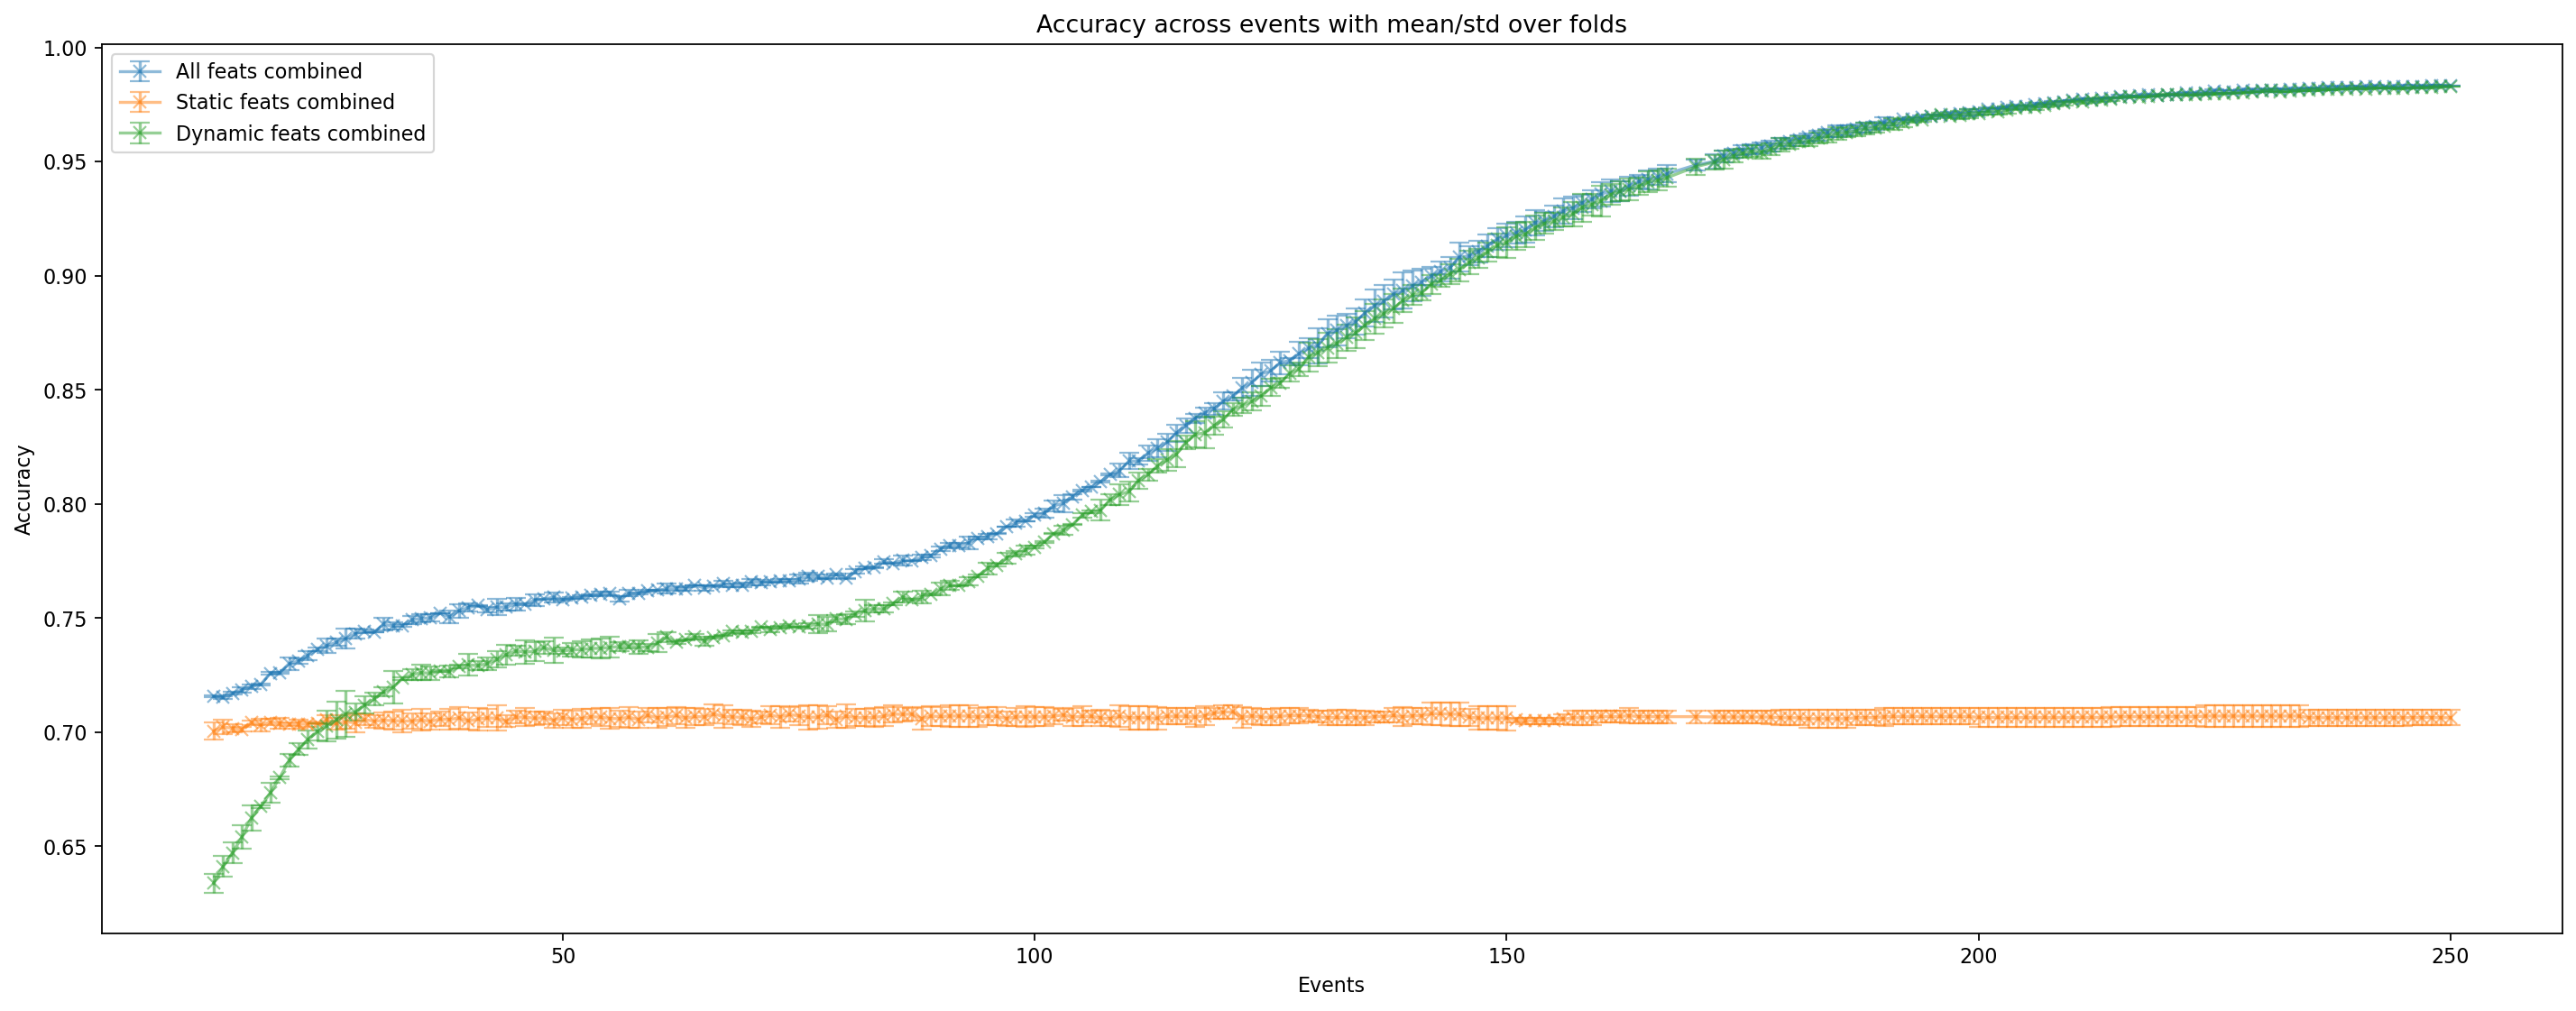

In [19]:
fig, ax = plt.subplots(figsize=(22,8), dpi=160)
# plt.errorbar(comb_index, list(map(lambda x:x[0], comb_test_bacc)), yerr=list(map(lambda x:x[1], comb_test_bacc)), fmt='-x', capsize=5, label="Combine Static and Dynamic", alpha=0.5)
plt.errorbar(all_index, list(map(lambda x:x[0], all_test_bacc)), yerr=list(map(lambda x:x[1], all_test_bacc)), fmt='-x', capsize=5, label="All feats combined", alpha=0.5)
plt.errorbar(s_index, list(map(lambda x:x[0], s_test_bacc)), yerr=list(map(lambda x:x[1], s_test_bacc)), fmt='-x', capsize=5, label="Static feats combined", alpha=0.5)
plt.errorbar(d_index, list(map(lambda x:x[0], d_test_bacc)), yerr=list(map(lambda x:x[1], d_test_bacc)), fmt='-x', capsize=5, label="Dynamic feats combined", alpha=0.5)

plt.ylabel('Accuracy')
plt.xlabel('Events')
plt.title("Accuracy across events with mean/std over folds")
plt.legend()
fig.savefig("error.png")
plt.show()


In [21]:
static_files = [file for file in os.listdir(static_dir) if file.startswith('static') and file.endswith('.joblib')] 
dynamic_files = [file for file in os.listdir(dynamic_dir) if file.startswith('dynamic') and file.endswith('.joblib')] 
comb_files = [file for file in os.listdir(comb_dir) if file.startswith('comb') and file.endswith('.joblib')] 
all_files = [file for file in os.listdir(all_dir) if file.startswith('all') and file.endswith('.joblib')] 
# s_static = sorted(static_files, key = lambda x: (int(x.split('_')[1]), int(x.split('_')[-1].split('.')[0]), x.split('_')[2]), reverse=True)
s_static = sorted(static_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
s_dict = agg_eidx_dict(s_static)

s_dynamic = sorted(dynamic_files, key = lambda x: (int(x.split('_')[2]), int(x.split('_')[-1].split('.')[0])), reverse=False)
d_dict = agg_eidx_dict(s_dynamic)
comb_dict = 

SyntaxError: invalid syntax (825239180.py, line 11)

In [20]:
index = []
static_train_bacc = []
static_train_ppv = []
static_train_roc = []

static_val_bacc = []
static_val_ppv = []
static_val_roc = []

static_test_bacc = []
static_test_ppv = []
static_test_roc = []

dynamic_train_bacc = []
dynamic_train_ppv = []
dynamic_train_roc = []

dynamic_val_bacc = []
dynamic_val_ppv = []
dynamic_val_roc = []

dynamic_test_bacc = []
dynamic_test_ppv = []
dynamic_test_roc = []
for key in s_dict:
    s_files_in_order = sorted(s_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    d_files_in_order = sorted(d_dict[key], key=lambda x: (int(x.split('_')[3].split('.')[0]), x.split('_')[2]), reverse=True)
    if len(s_files_in_order) == 0 or len(d_files_in_order)==0:
        print(f"Skipping {key} ")
        continue
    if len(s_files_in_order) != len(d_files_in_order):
        break
    
    sd_files = list(zip(s_files_in_order, d_files_in_order))


    static, dynamic =  sd_files[0]
    # for static, dynamic in sd_files:
    try:
        with open(os.path.join(static_dir, static), 'rb') as f:
            st_data = joblib.load(f)
            
        with open(os.path.join(dynamic_dir, dynamic), 'rb') as f:
            dyn_data = joblib.load(f)
    
        with open(os.path.join(comb_dir, dynamic), 'rb') as f:
            dyn_data = joblib.load(f)
    
        with open(os.path.join(all_dir, dynamic), 'rb') as f:
            dyn_data = joblib.load(f)
    except Exception as e:
        print(f"Skipping {key} ")
        continue

    print(f"Processing {key}")

    

    index.append(int(static.split('_')[2]))
    # for clc in st_data:
    clc = 'cat'
    static_train_bacc.append(st_data[clc]['train_score_avg']['bacc'])
    static_train_ppv.append(st_data[clc]['train_score_avg']['ppv'])
    static_train_roc.append(st_data[clc]['train_score_avg']['roc'])
    
    static_val_bacc.append(st_data[clc]['val_score_avg']['bacc'])
    static_val_ppv.append(st_data[clc]['val_score_avg']['ppv'])
    static_val_roc.append(st_data[clc]['val_score_avg']['roc'])

    static_test_bacc.append(st_data[clc]['test_results']['bacc'])
    static_test_ppv.append(st_data[clc]['test_results']['ppv'])
    static_test_roc.append(st_data[clc]['test_results']['roc'])
        
        
        # static_train_scores = st_data[clc]['train_score_avg']
        # static_val_scores = st_data[clc]['val_score_avg']
        # static_test_scores = st_data[clc]['test_results']
    
    # for clc in dyn_data:
    dynamic_train_bacc.append(dyn_data[clc]['train_score_avg']['bacc'])
    dynamic_train_ppv.append(dyn_data[clc]['train_score_avg']['ppv'])
    dynamic_train_roc.append(dyn_data[clc]['train_score_avg']['roc'])
    
    dynamic_val_bacc.append(dyn_data[clc]['val_score_avg']['bacc'])
    dynamic_val_ppv.append(dyn_data[clc]['val_score_avg']['ppv'])
    dynamic_val_roc.append(dyn_data[clc]['val_score_avg']['roc'])

    dynamic_test_bacc.append(dyn_data[clc]['test_results']['bacc'])
    dynamic_test_ppv.append(dyn_data[clc]['test_results']['ppv'])
    dynamic_test_roc.append(dyn_data[clc]['test_results']['roc'])




Skipping 6 
Skipping 8 
Skipping 9 
Skipping 10 
Skipping 11 
Skipping 12 
Skipping 13 
Skipping 14 
Skipping 15 
Skipping 16 
Skipping 17 
Skipping 18 
Skipping 19 
Skipping 20 
Skipping 21 
Skipping 22 
Skipping 23 
Skipping 24 
Skipping 25 
Skipping 26 
Skipping 27 
Skipping 28 
Skipping 29 
Skipping 30 
Skipping 31 
Skipping 32 
Skipping 33 
Skipping 34 
Skipping 35 
Skipping 36 
Skipping 37 
Skipping 38 
Skipping 39 
Skipping 40 
Skipping 41 
Skipping 42 
Skipping 43 
Skipping 44 
Skipping 45 
Skipping 46 
Skipping 47 
Skipping 48 
Skipping 49 
Skipping 50 
Skipping 51 
Skipping 52 
Skipping 53 
Skipping 54 
Skipping 55 
Skipping 56 
Skipping 57 
Skipping 58 
Skipping 59 
Skipping 60 
Skipping 61 
Skipping 62 
Skipping 63 
Skipping 64 
Skipping 65 
Skipping 66 
Skipping 67 
Skipping 68 
Skipping 69 
Skipping 70 
Skipping 71 
Skipping 72 
Skipping 73 
Skipping 74 
Skipping 75 
Skipping 76 
Skipping 77 
Skipping 78 
Skipping 79 
Skipping 80 
Skipping 81 
Skipping 82 
Skipping 178 
S

In [18]:
static_train_bacc

[]

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(24, 12))
# for i in range(3):
    # for j in range(3):
        # all_range = np.arange(np.min(index), np.max(index)+1)
        # axes[i][j].plot(all_range, [0]*len(all_range))

axes[0][0].scatter(index, static_train_bacc)
axes[0][1].scatter(index, static_train_ppv)
axes[0][2].scatter(index, static_train_roc)

axes[1][0].scatter(index, static_val_bacc)
axes[1][1].scatter(index, static_val_ppv)
axes[1][2].scatter(index, static_val_roc)

axes[2][0].scatter(index, static_test_bacc)
axes[2][1].scatter(index, static_test_ppv)
axes[2][2].scatter(index, static_test_roc)


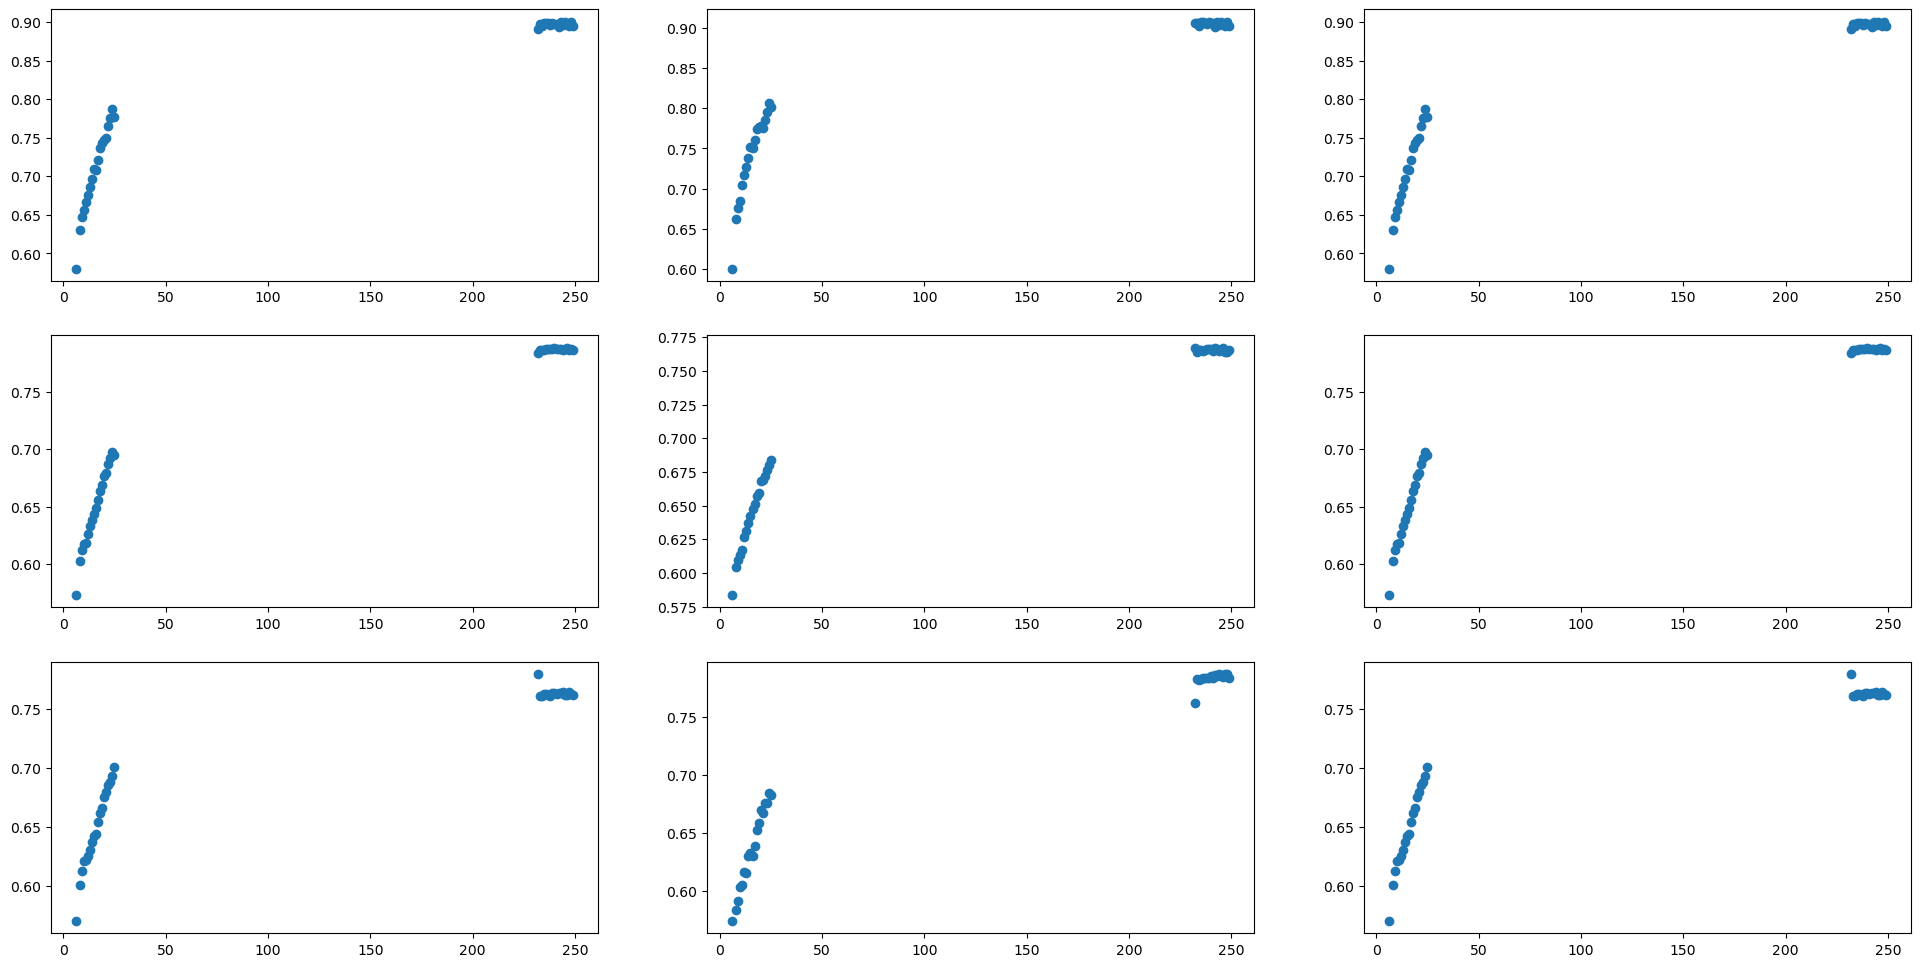

In [78]:
fig, axes = plt.subplots(3,3, figsize=(24, 12))

axes[0][0].scatter(index, dynamic_train_bacc)
axes[0][1].scatter(index, dynamic_train_ppv)
axes[0][2].scatter(index, dynamic_train_roc)

axes[1][0].scatter(index, dynamic_val_bacc)
axes[1][1].scatter(index, dynamic_val_ppv)
axes[1][2].scatter(index, dynamic_val_roc)

axes[2][0].scatter(index, dynamic_test_bacc)
axes[2][1].scatter(index, dynamic_test_ppv)
axes[2][2].scatter(index, dynamic_test_roc)

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(24, 12))

axes[0][0].scatter(index, dynamic_train_bacc)
axes[0][1].scatter(index, dynamic_train_ppv)
axes[0][2].scatter(index, dynamic_train_roc)

axes[1][0].scatter(index, dynamic_val_bacc)
axes[1][1].scatter(index, dynamic_val_ppv)
axes[1][2].scatter(index, dynamic_val_roc)

axes[2][0].scatter(index, dynamic_test_bacc)
axes[2][1].scatter(index, dynamic_test_ppv)
axes[2][2].scatter(index, dynamic_test_roc)